# Análisis exploración pozos de petróleo

## Preprocesamiento de datos
Descargar todas las librerias que se van a usar y abrir los archivos

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
data_0=pd.read_csv('/datasets/geo_data_0.csv')
data_1=pd.read_csv('/datasets/geo_data_1.csv')
data_2=pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
#Se elimina las filas que estan duplicadas
data_0= data_0.drop_duplicates().reset_index(drop=True)

#Se elimina las filas donde el id esta duplicado
data_0=data_0.drop_duplicates(subset=['id']).reset_index(drop=True)

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
#Se elimina las filas que estan duplicadas
data_1= data_1.drop_duplicates().reset_index(drop=True)

#Se elimina las filas donde el id esta duplicado
data_1=data_1.drop_duplicates(subset=['id']).reset_index(drop=True)

In [7]:
data_2.info()
data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
#Se elimina las filas que estan duplicadas
data_2= data_2.drop_duplicates().reset_index(drop=True)

#Se elimina las filas donde el id esta duplicado
data_2=data_2.drop_duplicates(subset=['id']).reset_index(drop=True)

Se observa que ninguno de los archivos tiene valores auscentes y el tipo de cada variable es correcto, y se eliminan las filas que están duplicadas y las filas donde los id esten duplicadas ya que este es único para cada pozo por lo que no deben haber iguales.

## Modelo de entrenamiento 

Para realizar este entrenamiento no se tomara en cuenta la columna ID ya que esta no aporta información relevante para este modelo, ya que son números único utilizados para identificar el pozo. También se observa que en estos datos no hay características categóricas.

In [9]:
region_0=data_0.drop('id', axis='columns')

Se divide los datos en features y el target que para este caso es 'product', que es volumen de reservas en el pozo de petróleo (miles de barriles). Luego dividimos todo en un conjunto de entrenamiento y uno de validación, con una proporción de 75:25

In [10]:
features=region_0.drop(['product'], axis='columns')
target=region_0['product']

features_train, features_valid, target_train, target_valid, id_train, id_valid = train_test_split(
    features, target, data_0['id'] ,test_size=0.25, random_state=12345)

In [11]:
#inicia el modelo
model_0 = LinearRegression()

#Entrena el modelo en el conjunto de entrenamiento
model_0.fit(features_train,target_train)

#predicted value
predictions_valid = model_0.predict(features_valid)

# calcula la RMSE en el conjunto de validación
mean_volume=predictions_valid.mean()
result = mean_squared_error(target_valid,predictions_valid)**0.5

print("El volumen medio de reservas predicho es de:", mean_volume)
print("RMSE del modelo de regresión lineal en el conjunto de validación:", result)

El volumen medio de reservas predicho es de: 92.78915638280621
RMSE del modelo de regresión lineal en el conjunto de validación: 37.853527328872964


### Función para entrenamiento del modelo para las regiones

In [12]:
def model (data):
    region=data.drop('id', axis='columns')
    features=region.drop(['product'], axis='columns')
    target=region['product']

    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, 
                                                                                  random_state=12345)
    #inicia el modelo
    model = LinearRegression()

    #Entrena el modelo en el conjunto de entrenamiento
    model.fit(features_train,target_train)

    #predicted value
    predictions_valid = model.predict(features_valid)

    # calcula la RMSE en el conjunto de validación
    mean_volume=predictions_valid.mean()
    result = mean_squared_error(target_valid,predictions_valid)**0.5

    return  mean_volume,result, predictions_valid
   

In [13]:
model0=model(data_0)

print("El volumen medio de reservas predicho es de:", model0[0])
print("RMSE del modelo de regresión lineal en el conjunto de validación:", model0[1])

El volumen medio de reservas predicho es de: 92.78915638280621
RMSE del modelo de regresión lineal en el conjunto de validación: 37.853527328872964


### Resultado para la región 1

In [14]:
model1=model(data_1)

print("El volumen medio de reservas predicho es de:", model1[0])
print("RMSE del modelo de regresión lineal en el conjunto de validación:", model1[1])

El volumen medio de reservas predicho es de: 69.17831957030432
RMSE del modelo de regresión lineal en el conjunto de validación: 0.8920592647717029


### Resultado para la región 2

In [15]:
model2=model(data_2)

print("El volumen medio de reservas predicho es de:", model2[0])
print("RMSE del modelo de regresión lineal en el conjunto de validación:", model2[1])

El volumen medio de reservas predicho es de: 94.86572480562035
RMSE del modelo de regresión lineal en el conjunto de validación: 40.07585073246016


### Conclusiones
Al observar los resultados obtenidos por el modelo para las tres regiones, se ve que la región que tiene un promedio de volumen de petrole o más grande es la 2, sin embargo para esta región la raíz del error cuadrático medio (RMSE) es muy alta, de 40. Lo mismo se observa con los resultados de la región 1, el volumen medio de reservas es alto pero su RMSE es muy alta.

La región donde se obtuvieron mejores resultados en la región 1 ya que RMSE, es muy baja y el promedio de volumen de reservas en el pozo de petróleo en esta región es de 68.7 aprox.


## Calculo de ganancias
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

- El ingreso de una unidad de producto es de 4500 dólares

- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%

In [16]:
presupuesto= 100000000
ingreso= 4500
perdidas_min=0.025
num_pozos=200

Se toma la lista de los volumenes predichos para cada región y se organizan de forma descendente para tomar los mejores 200 pozos.

### Calculo de ganacias potenciales por región 

In [17]:
#Se define una función que selecciona los mejores 200 pozos que se obtienen al entrenar el modelo
def best_200(region_data):
    sorted_volumes=-np.sort(-region_data)
    best_200=sorted_volumes[:num_pozos]
    
    return pd.Series(best_200)

In [18]:
region_0_best= best_200(model0[2])
region_1_best= best_200(model1[2])
region_2_best= best_200(model2[2])

In [19]:
#Función que calcula las ganancias
def ganancias(volume_data):
    ganancia=(sum(volume_data)*ingreso)-presupuesto
    
    return ganancia

In [20]:
print (f'Las ganacias para la región cero son de {ganancias(region_0_best)}')
print (f'Las ganacias para la región uno son de {ganancias(region_1_best)}')
print (f'Las ganacias para la región dos son de {ganancias(region_2_best)}')

Las ganacias para la región cero son de 39816309.10522351
Las ganacias para la región uno son de 24860607.851266265
Las ganacias para la región dos son de 33629149.07793103


### Conclusiones

Se calculo las ganancias potenciales multiplicando el volumen de reseva de pozos predecidos por el modelo y se multiplica por  4500 dólares que es lo que se obtiene por cada unidad. 

Con base en las ganancias obtenidas para cada región, escogería la región 0 para el desarrollo de pozos petrolíferos, ya que es en la que se obuvieron mayores ganancias y a pesar de que la RMSE del modelo es alta no es tan alta como el que se obtuvo para la región 2, y las ganancias de esta región son mucho más altas que los de la región 1.

## Cálculo de riesgo y ganancia por región

### Aplicar técnica del bootstraping

Se crea una función para realizar el bootstaraping, donde los parametros que recibe son los datos predichos por el modelo para cada región, y el número de veces que se realiza el resample, para qeste caso es de 1000. y se le calcula las ganancias escogiendo los mejores 200 pozos. Como queremos un intervalo de confianza de 95%, se calcula el cuantil de 2.5% y 97.5%. Luego se grafica la distribución de los beneficios. 

Por último se calcula la probabilidad de perdida, para esto se cuenta las veces en las que la ganancia es negativa y se divide sobre el total de muestra y se multiplica por 100 para expresarla en porcentaje.

In [21]:
def create_bootstrap_samples(region_model, n_samples = 1000):
    values=[]
    state=np.random.RandomState(12345)
    count=0
    
    for i in range(n_samples):
        bootstrap_sample=pd.Series(region_model).sample(n=500, replace = True, random_state=state)
    
        sorted_volumes=(bootstrap_sample.sort_values(ascending=False))[:200]
        beneficio= ganancias(sorted_volumes)
        
        if beneficio<0:
            count+=1
        values.append(beneficio)
        
    values= pd.Series(values)
        
    lower = values.quantile(q = 0.025)
    higher = values.quantile(q = 0.975)

    #probabilidad de perdida
    probabilidad= count/n_samples*100
    
    # Grafica la distribución
    values.plot(kind = 'hist', bins = 20, title= 'Distribución de los beneficios')

    # Se adiciona los cuantiles del nivel de confianza
    plt.axvline(lower, color = 'red', ls = '--')
    plt.axvline(higher, color = 'red', ls = '--')
    
    return f'cuantil del 2.5%: {lower}', f'La media de la región es:{values.mean()}', f'La probabilidad de perdida:{probabilidad}%'

### Bootstrapping para Región 0 

('cuantil del 2.5%: 1597195.8218842887',
 'La media de la región es:3815855.4738548263',
 'La probabilidad de perdida:0.1%')

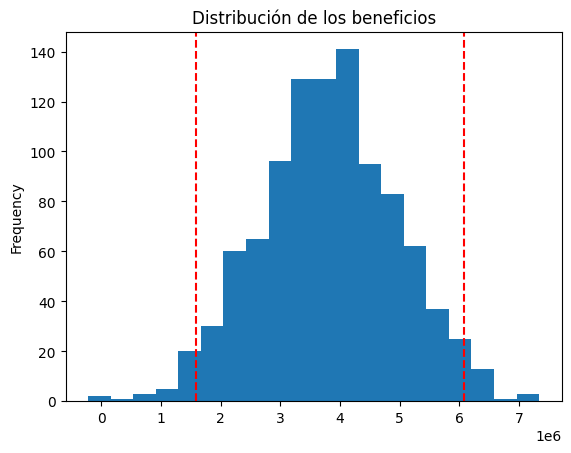

In [22]:
create_bootstrap_samples(model0[2])

### Bootstrapping para Región 1

('cuantil del 2.5%: 872771.3438961939',
 'La media de la región es:4750966.02699624',
 'La probabilidad de perdida:1.2%')

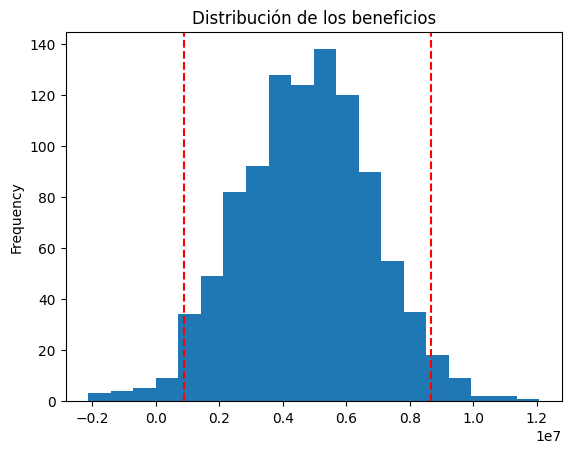

In [23]:
create_bootstrap_samples(model1[2])

### Bootstrapping para Región 2

('cuantil del 2.5%: 1046744.4054076117',
 'La media de la región es:2997133.9679976427',
 'La probabilidad de perdida:0.0%')

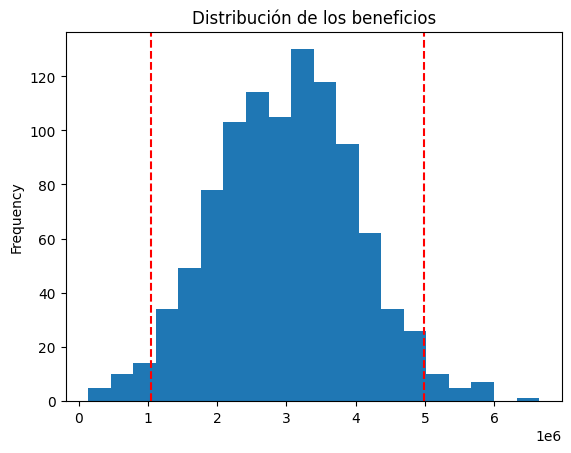

In [24]:
create_bootstrap_samples(model2[2])

## Conclusiones



Al realizar el bootstrapping para las tres regiones, la región que escogería para el desarrollo de pozos petrolíferos es la region 1, ya que al hacer el bootstrapping fue la región en donde se obtuvo una media mayor comparada con las otras regiones, a pesar de que fue la región donde el porcentaje de perdida fue el más alto de las tres regiones este sigue siendo bajo, apenas del 1.2%. 